<a href="https://colab.research.google.com/github/ulubeykhuja/Amaliyot/blob/main/MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [4]:
housing = df[df.district=='Чиланзарский']
housing.shape

(1616, 6)

Train - Test split

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.1, random_state=42)

ML

In [33]:
from sklearn import linear_model
MLR_model = linear_model.LinearRegression()
# x ga bir nechta qiymatlar beriladi
# bu paramerlar muhim bo'lmaganligi uchun olib tashlaymiz
# x_train = np.asanyarray(train_set[['rooms', 'size', 'level', 'max_levels']])
x_train = np.asanyarray(train_set[['size','max_levels']])
y_train = np.asanyarray(train_set[['price']])

MLR_model.fit(x_train, y_train) # Modelni o'qitish

print("Coeffisient: ", MLR_model.coef_)
print("Teta0): " , MLR_model.intercept_)


Coeffisient:  [[ 747.04795007 -393.4032521 ]]
Teta0):  [1341.57534414]


Qaysi ustun ko'p bo'lsa shu parametr muhim
masalan 'size' eng muhimi

**Modelni baholash**

In [34]:
# x_test = np.asanyarray(test_set[['rooms', 'size', 'level', 'max_levels']])
x_test = np.asanyarray(test_set[['size', 'max_levels']])
y_test = np.asanyarray(test_set[['price']])
y_predict = MLR_model.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MAE: ", mean_absolute_error(y_test, y_predict))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_predict)))

MAE:  7193.9223780657785
RMSE:  12635.660248895361


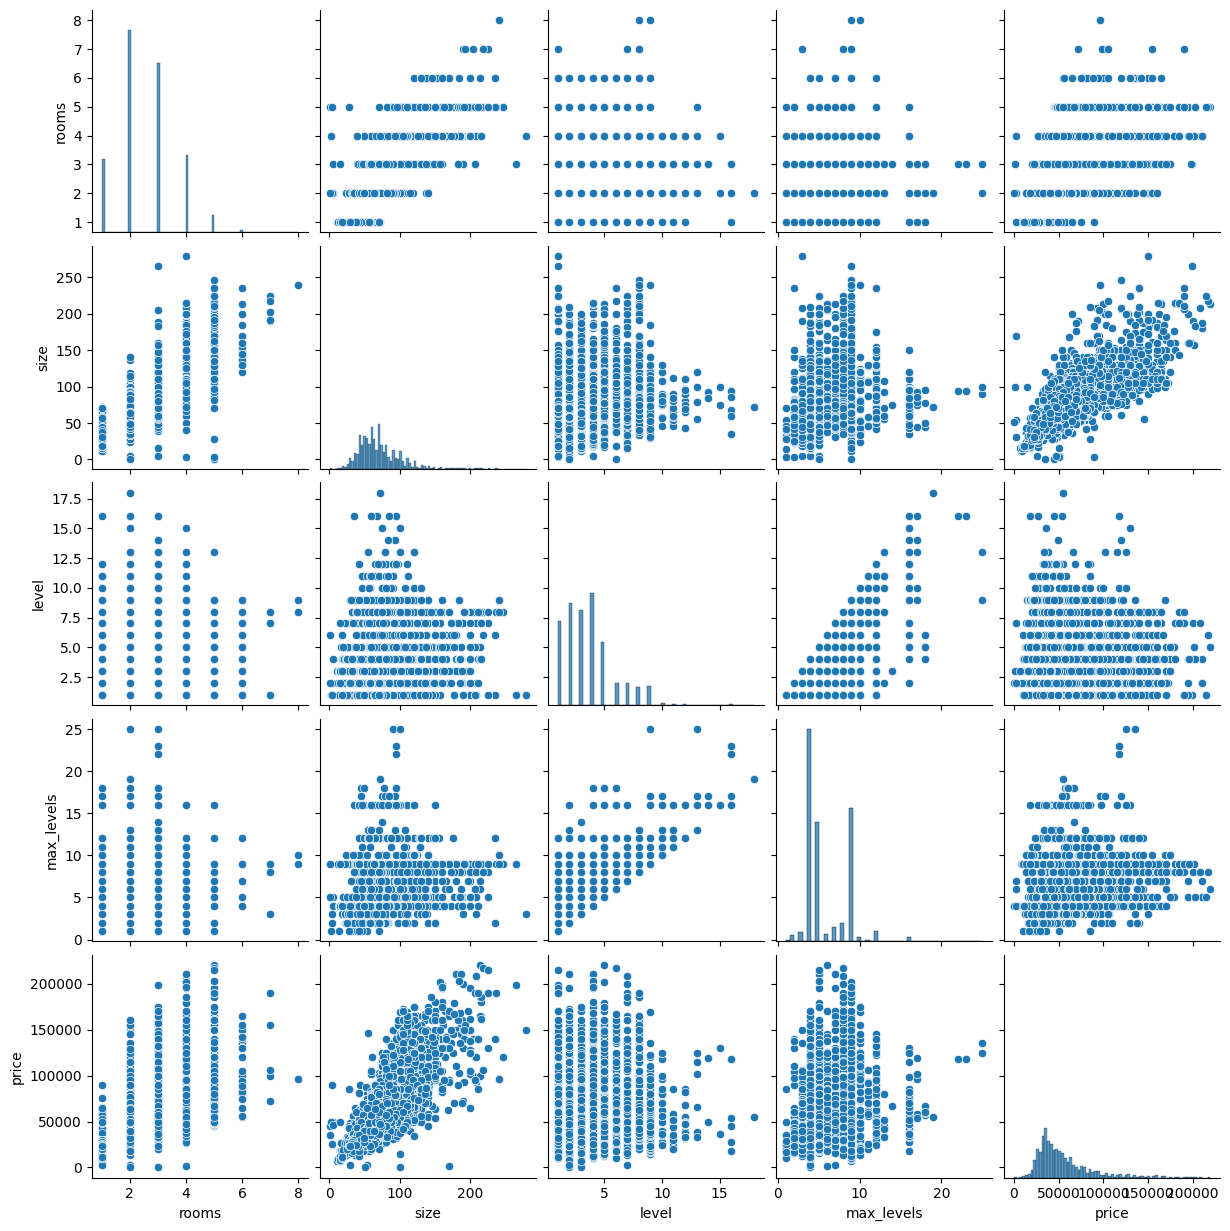

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(df[['rooms','size','level','max_levels','price']])
plt.show()